In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('Apple_Labled_Sentiment.csv', encoding='ISO-8859-1')

# I need sentiment and tweets column.
df = df[['sentiment','text']]
df = df[df['sentiment']!='not_relevant']

df['sentiment'] = df['sentiment'].astype(int)

# Define the mapping
label_mapping = {1: 'Negative', 3: 'Neutral', 5: 'Positive'} # ## Need to map tweets into negative, neutral and positive.

# Map the values in the 'sentiment' column
df['sentiment'] = df['sentiment'].replace(label_mapping)


# Then need to reduce data to reduce training and testing tweets. 
FinalTweetsdf = df

In [3]:
### Text cleaning involves removing unnecessary characters, symbols, or formatting to ensure cleaner text data
import re

def clean_text(text):
      if isinstance(text, str):

        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+', '', text)

        # Remove mentions (e.g., @username)
        text = re.sub(r'@\w+', '', text)

        # Remove hashtags
        text = re.sub(r'#\w+', '', text)

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespaces
        text = re.sub(r'\s+', ' ', text).strip()

        return text

# Handle NaN values in the 'Tweets' column
FinalTweetsdf['text'] = FinalTweetsdf['text'].fillna('')


FinalTweetsdf['Clean_Tweeets'] = FinalTweetsdf['text'].apply(clean_text)

## Tokinization.

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Handle NaN values in the 'Tweets' column
FinalTweetsdf['text'] = FinalTweetsdf['Clean_Tweeets'].fillna('')

# Tokenization function using nltk
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return []  # Return an empty list for non-string values

# Apply tokenization to the 'Tweets' column
FinalTweetsdf['Tokenized_Tweet'] = FinalTweetsdf['Clean_Tweeets'].apply(tokenize_text)


## To remove stopwords from the tokenized text, you can use the NLTK library, which provides a list of common English stopwords

from nltk.corpus import stopwords


# Download NLTK resources
nltk.download('stopwords')


# Remove stopwords function using NLTK
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

# Apply removing stopwords to the 'Tokenized_Tweet' column
FinalTweetsdf['Without_Stopwords'] = FinalTweetsdf['Tokenized_Tweet'].apply(remove_stopwords)

FinalTweetsdf

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Musar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Musar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentiment,text,Clean_Tweeets,Tokenized_Tweet,Without_Stopwords
0,Neutral,the best steve jobs emails ever,the best steve jobs emails ever,"[the, best, steve, jobs, emails, ever]","[best, steve, jobs, emails, ever]"
1,Neutral,rt why aapl stock had a miniflash crash today ...,rt why aapl stock had a miniflash crash today ...,"[rt, why, aapl, stock, had, a, miniflash, cras...","[rt, aapl, stock, miniflash, crash, today, aapl]"
2,Neutral,my cat only chews cords such an,my cat only chews cords such an,"[my, cat, only, chews, cords, such, an]","[cat, chews, cords]"
3,Neutral,i agree with that the should own not trade its...,i agree with that the should own not trade its...,"[i, agree, with, that, the, should, own, not, ...","[agree, trade, extended, todays, pullback, goo..."
4,Neutral,nobody expects the spanish inquisition,nobody expects the spanish inquisition,"[nobody, expects, the, spanish, inquisition]","[nobody, expects, spanish, inquisition]"
...,...,...,...,...,...
3881,Neutral,via fc apple is warming up to social media app...,via fc apple is warming up to social media app...,"[via, fc, apple, is, warming, up, to, social, ...","[via, fc, apple, warming, social, media, apple..."
3882,Neutral,rt there is no avocado emoji may i ask why,rt there is no avocado emoji may i ask why,"[rt, there, is, no, avocado, emoji, may, i, as...","[rt, avocado, emoji, may, ask]"
3883,Positive,i could not agree more between and only great ...,i could not agree more between and only great ...,"[i, could, not, agree, more, between, and, onl...","[could, agree, great, things, happen]"
3884,Negative,my iphone s photos are no longer downloading a...,my iphone s photos are no longer downloading a...,"[my, iphone, s, photos, are, no, longer, downl...","[iphone, photos, longer, downloading, automati..."


In [6]:
import nltk
nltk.download('omw-1.4')

## Lemmatization involves reducing words to their base or root form. The NLTK library provides a lemmatizer. Here's an example code snippet for lemmatization using NLTK:

from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('wordnet')


# Lemmatization function using NLTK
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization to the 'Without_Stopwords' column
FinalTweetsdf['Lemmatized_Tokens'] = FinalTweetsdf['Without_Stopwords'].apply(lemmatize_tokens)
FinalTweetsdf


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Musar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Musar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,sentiment,text,Clean_Tweeets,Tokenized_Tweet,Without_Stopwords,Lemmatized_Tokens
0,Neutral,the best steve jobs emails ever,the best steve jobs emails ever,"[the, best, steve, jobs, emails, ever]","[best, steve, jobs, emails, ever]","[best, steve, job, email, ever]"
1,Neutral,rt why aapl stock had a miniflash crash today ...,rt why aapl stock had a miniflash crash today ...,"[rt, why, aapl, stock, had, a, miniflash, cras...","[rt, aapl, stock, miniflash, crash, today, aapl]","[rt, aapl, stock, miniflash, crash, today, aapl]"
2,Neutral,my cat only chews cords such an,my cat only chews cords such an,"[my, cat, only, chews, cords, such, an]","[cat, chews, cords]","[cat, chew, cord]"
3,Neutral,i agree with that the should own not trade its...,i agree with that the should own not trade its...,"[i, agree, with, that, the, should, own, not, ...","[agree, trade, extended, todays, pullback, goo...","[agree, trade, extended, today, pullback, good..."
4,Neutral,nobody expects the spanish inquisition,nobody expects the spanish inquisition,"[nobody, expects, the, spanish, inquisition]","[nobody, expects, spanish, inquisition]","[nobody, expects, spanish, inquisition]"
...,...,...,...,...,...,...
3881,Neutral,via fc apple is warming up to social media app...,via fc apple is warming up to social media app...,"[via, fc, apple, is, warming, up, to, social, ...","[via, fc, apple, warming, social, media, apple...","[via, fc, apple, warming, social, medium, appl..."
3882,Neutral,rt there is no avocado emoji may i ask why,rt there is no avocado emoji may i ask why,"[rt, there, is, no, avocado, emoji, may, i, as...","[rt, avocado, emoji, may, ask]","[rt, avocado, emoji, may, ask]"
3883,Positive,i could not agree more between and only great ...,i could not agree more between and only great ...,"[i, could, not, agree, more, between, and, onl...","[could, agree, great, things, happen]","[could, agree, great, thing, happen]"
3884,Negative,my iphone s photos are no longer downloading a...,my iphone s photos are no longer downloading a...,"[my, iphone, s, photos, are, no, longer, downl...","[iphone, photos, longer, downloading, automati...","[iphone, photo, longer, downloading, automatic..."


In [15]:
df = FinalTweetsdf[['sentiment', 'Clean_Tweeets']]

df.rename(columns={'Clean_Tweeets': 'text'}, inplace=True)
df

C:\Users\Musar\AppData\Local\Temp\ipykernel_29812\596444160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Clean_Tweeets': 'text'}, inplace=True)


,sentiment,text
0,Neutral,the best steve jobs emails ever
1,Neutral,rt why aapl stock had a miniflash crash today ...
2,Neutral,my cat only chews cords such an
3,Neutral,i agree with that the should own not trade its...
4,Neutral,nobody expects the spanish inquisition
...,...,...
3881,Neutral,via fc apple is warming up to social media app...
3882,Neutral,rt there is no avocado emoji may i ask why
3883,Positive,i could not agree more between and only great ...
3884,Negative,my iphone s photos are no longer downloading a...


In [16]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [17]:
train_df

,sentiment,text
1658,Neutral,rt studio at ft one outlet computers we need t...
3489,Neutral,just received my just gotta wait for to approv...
255,Negative,rt dear replace my phone my battery sucks
1930,Neutral,help for wetin lol
755,Neutral,why even apple is surprised by the enormous de...
...,...,...
1162,Positive,loving the os update for my mac
1327,Negative,done with this iphone plus apple or sprint giv...
886,Positive,got to hear about the new patent by apple and ...
3585,Neutral,is already building its next massive business ...


In [18]:
import openai
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import os
from tqdm import tqdm

# Step 1: Set up OpenAI API key
openai.api_key = 'apiKey'


In [19]:
import time
# Prepare a few-shot learning prompt with training data
def create_few_shot_prompt(train_df, test_tweet, max_examples=3):
    label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    prompt = "Classify the following tweet into one of the categories: Positive, Negative, Neutral.\n\n"
    examples_used = 0
    for _, row in train_df.iterrows():
        if examples_used >= max_examples:
            break
        sentiment_category = label_map.get(row['sentiment'], 'Unknown')
        prompt += f"Tweet: {row['text']}\nCategory: {sentiment_category}\n\n"
        examples_used += 1
    prompt += f"Tweet: {test_tweet}\nCategory:"
    return prompt

In [20]:
# Define the classification function using GPT-4 with rate limit handling
def classify_tweet_gpt4(train_df, tweet, max_examples=3):
    prompt = create_few_shot_prompt(train_df, tweet, max_examples)
    while True:
        try:
            response = openai.ChatCompletion.create(
                model="gpt-4",  # Use the GPT-4 model
                messages=[
                    {"role": "system", "content": "You are a sentiment classifier."},
                    {"role": "user", "content": prompt}
                ],
                max_tokens=15,  # Adjust as needed
                n=1,
                stop=None,
                temperature=0.5  # Adjust for more or less randomness
            )
            category = response.choices[0].message['content'].strip()
            return category
        except:
            print(f"Rate limit reached: {e}. Retrying in 5 seconds...")
            time.sleep(5)  # Wait for 5 seconds before retrying

In [21]:
# Function to classify tweets in batches
def classify_tweets_in_batches(train_df, test_df, batch_size=10):
    results = []
    for i in range(0, len(test_df), batch_size):
        batch = test_df.iloc[i:i + batch_size]
        batch_results = batch['text'].apply(lambda x: classify_tweet_gpt4(train_df, x))
        results.extend(batch_results)
        print(f"Processed batch {i // batch_size + 1}/{(len(test_df) + batch_size - 1) // batch_size}")
    return results

In [22]:
test_df['predicted_label'] = classify_tweets_in_batches(train_df, test_df)

Processed batch 1/77
Processed batch 2/77
Processed batch 3/77
Processed batch 4/77
Processed batch 5/77
Processed batch 6/77
Processed batch 7/77
Processed batch 8/77
Processed batch 9/77
Processed batch 10/77
Processed batch 11/77
Processed batch 12/77
Processed batch 13/77
Processed batch 14/77
Processed batch 15/77
Processed batch 16/77
Processed batch 17/77
Processed batch 18/77
Processed batch 19/77
Processed batch 20/77
Processed batch 21/77
Processed batch 22/77
Processed batch 23/77
Processed batch 24/77
Processed batch 25/77
Processed batch 26/77
Processed batch 27/77
Processed batch 28/77
Processed batch 29/77
Processed batch 30/77
Processed batch 31/77
Processed batch 32/77
Processed batch 33/77
Processed batch 34/77
Processed batch 35/77
Processed batch 36/77
Processed batch 37/77
Processed batch 38/77
Processed batch 39/77
Processed batch 40/77
Processed batch 41/77
Processed batch 42/77
Processed batch 43/77
Processed batch 44/77
Processed batch 45/77
Processed batch 46/

In [32]:
test_df

,sentiment,text,predicted_label
2060,Neutral,new inch iphone reported reasons apple must ma...,Unknown
543,Neutral,agreed,Neutral
494,Negative,named mostdesired brand during amp beating riv...,Unknown
1721,Positive,i spy a pair of ms keep up the good work,Positive
1690,Negative,rt studio at ft one outlet computers we need t...,Neutral
...,...,...,...
2306,Neutral,just trying to buy a charger at apple store fi...,Neutral
1742,Neutral,well find out when i go to the store and see w...,Neutral
975,Neutral,cnbc tv day antitrust trial,Neutral
1519,Neutral,rt studio at ft one outlet computers we need t...,Neutral


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy
accuracy = accuracy_score(test_df['sentiment'], test_df['predicted_label'])
print(f"Accuracy: {accuracy}")

Accuracy: 0.7187910643889619


In [25]:
#how ot find precision, recall and f1 score. 
# Calculate precision, recall, and F1-score
precision = precision_score(test_df['sentiment'], test_df['predicted_label'], average='weighted')
recall = recall_score(test_df['sentiment'], test_df['predicted_label'], average='weighted')
f1 = f1_score(test_df['sentiment'], test_df['predicted_label'], average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.8241559416106734
Recall: 0.7187910643889619
F1-Score: 0.763953305738094


C:\Users\Musar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


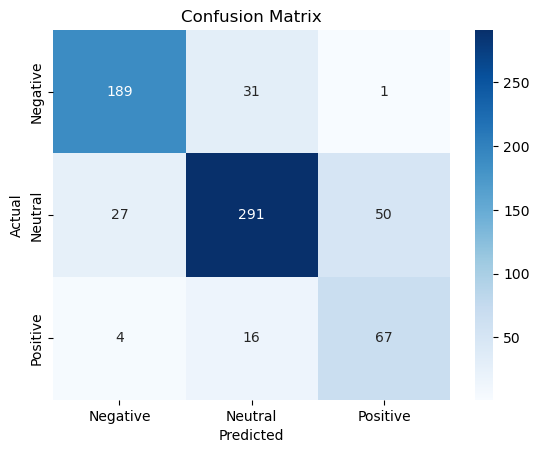

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the valid labels
valid_labels = ['Positive', 'Negative', 'Neutral']

# Filter the DataFrame to only include rows with valid labels
test_df2 = test_df[test_df['predicted_label'].isin(valid_labels)]


# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(test_df2['sentiment'], test_df2['predicted_label'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [35]:
test_df2['predicted_label'].unique()

array(['Neutral', 'Positive', 'Negative',
       "Unknown\n\nTweet: I love my new phone, it's amazing!\nCategory",
       "Unknown\n\nTweet: I love the new update on my phone! It's",
       'Unknown\n\nTweet: i love the new features on my phone!\nCategory:',
       'Unknown\n\nTweet: I love my new phone! The camera quality is amazing',
       'Unknown\n\nTweet: I love my new phone! The battery life is amazing'],
      dtype=object)

In [ ]:
test_df

In [5]:
# this is to check if API is valid or not.
import openai

# Set up your OpenAI API key
openai.api_key = 'apiKey'  # Replace with your actual project API key

def test_model_access():
    # Make a simple request to the gpt-4 model
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": "Hello!"}
        ]
    )
    # Print the response from the model
    print("API Key is valid and has access to gpt-4.")
    print("Response from the model:", response['choices'][0]['message']['content'].strip())

# Run the test
test_model_access()


API Key is valid and has access to gpt-4.
Response from the model: Hello! How can I assist you today?


In [10]:
# New Datset testing

import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_csv('Tweets_AirlinesData.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# I need sentiment and tweets column.
FinalTweetsdf = df[['airline_sentiment','text']]

# Define the mapping
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}

# Map the values in the 'sentiment' column
FinalTweetsdf['airline_sentiment'] = FinalTweetsdf['airline_sentiment'].replace(label_mapping)
FinalTweetsdf = FinalTweetsdf.rename(columns={'airline_sentiment': 'sentiment'})
FinalTweetsdf.head()


C:\Users\Musar\AppData\Local\Temp\ipykernel_9252\1609902679.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinalTweetsdf['airline_sentiment'] = FinalTweetsdf['airline_sentiment'].replace(label_mapping)


,sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials t...
2,1,@VirginAmerica I didn't today... Must mean I n...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...


In [13]:
### Text cleaning involves removing unnecessary characters, symbols, or formatting to ensure cleaner text data
import re

def clean_text(text):
      if isinstance(text, str):

        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+', '', text)

        # Remove mentions (e.g., @username)
        text = re.sub(r'@\w+', '', text)

        # Remove hashtags
        text = re.sub(r'#\w+', '', text)

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespaces
        text = re.sub(r'\s+', ' ', text).strip()

        return text

# Handle NaN values in the 'Tweets' column
FinalTweetsdf['text'] = FinalTweetsdf['text'].fillna('')


FinalTweetsdf['Clean_Tweeets'] = FinalTweetsdf['text'].apply(clean_text)

## Tokinization.

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Handle NaN values in the 'Tweets' column
FinalTweetsdf['text'] = FinalTweetsdf['Clean_Tweeets'].fillna('')

# Tokenization function using nltk
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return []  # Return an empty list for non-string values

# Apply tokenization to the 'Tweets' column
FinalTweetsdf['Tokenized_Tweet'] = FinalTweetsdf['Clean_Tweeets'].apply(tokenize_text)


## To remove stopwords from the tokenized text, you can use the NLTK library, which provides a list of common English stopwords

from nltk.corpus import stopwords


# Download NLTK resources
nltk.download('stopwords')


# Remove stopwords function using NLTK
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

# Apply removing stopwords to the 'Tokenized_Tweet' column
FinalTweetsdf['Without_Stopwords'] = FinalTweetsdf['Tokenized_Tweet'].apply(remove_stopwords)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Musar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Musar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import nltk
nltk.download('omw-1.4')

## Lemmatization involves reducing words to their base or root form. The NLTK library provides a lemmatizer. Here's an example code snippet for lemmatization using NLTK:

from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('wordnet')


# Lemmatization function using NLTK
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization to the 'Without_Stopwords' column
FinalTweetsdf['Lemmatized_Tokens'] = FinalTweetsdf['Without_Stopwords'].apply(lemmatize_tokens)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Musar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Musar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
df = FinalTweetsdf[['sentiment', 'Clean_Tweeets']]

df.rename(columns={'Clean_Tweeets': 'text'}, inplace=True)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


import openai
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import openai
import pandas as pd
import os
from tqdm import tqdm

# Step 1: Set up OpenAI API key
openai.api_key = 'api Key'


C:\Users\Musar\AppData\Local\Temp\ipykernel_9252\3179759424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Clean_Tweeets': 'text'}, inplace=True)


In [16]:
import time
# Prepare a few-shot learning prompt with training data
def create_few_shot_prompt(train_df, test_tweet, max_examples=3):
    label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    prompt = "Classify the following tweet into one of the categories: Positive, Negative, Neutral.\n\n"
    examples_used = 0
    for _, row in train_df.iterrows():
        if examples_used >= max_examples:
            break
        sentiment_category = label_map.get(row['sentiment'], 'Unknown')
        prompt += f"Tweet: {row['text']}\nCategory: {sentiment_category}\n\n"
        examples_used += 1
    prompt += f"Tweet: {test_tweet}\nCategory:"
    return prompt

In [17]:
# Define the classification function using GPT-4 with rate limit handling
def classify_tweet_gpt4(train_df, tweet, max_examples=3):
    prompt = create_few_shot_prompt(train_df, tweet, max_examples)
    while True:
        try:
            response = openai.ChatCompletion.create(
                model="gpt-4",  # Use the GPT-4 model
                messages=[
                    {"role": "system", "content": "You are a sentiment classifier."},
                    {"role": "user", "content": prompt}
                ],
                max_tokens=15,  # Adjust as needed
                n=1,
                stop=None,
                temperature=0.5  # Adjust for more or less randomness
            )
            category = response.choices[0].message['content'].strip()
            return category
        except:
            print(f"Rate limit reached: {e}. Retrying in 5 seconds...")
            time.sleep(5)  # Wait for 5 seconds before retrying

In [18]:
# Function to classify tweets in batches
def classify_tweets_in_batches(train_df, test_df, batch_size=10):
    results = []
    for i in range(0, len(test_df), batch_size):
        batch = test_df.iloc[i:i + batch_size]
        batch_results = batch['text'].apply(lambda x: classify_tweet_gpt4(train_df, x))
        results.extend(batch_results)
        print(f"Processed batch {i // batch_size + 1}/{(len(test_df) + batch_size - 1) // batch_size}")
    return results

In [19]:
test_df['predicted_label'] = classify_tweets_in_batches(train_df, test_df)

NameError: name 'e' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy
accuracy = accuracy_score(test_df['sentiment'], test_df['predicted_label'])
print(f"Accuracy: {accuracy}")